In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [73]:
sns.set(rc={'figure.figsize':[15,11]},font_scale=1.2)

## Loading The data

In [74]:
customers = pd.read_csv('customer .csv')

In [75]:
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### we have missing values in tenure, SeniorCitizen cols

In [76]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
#customers.set_index('customerID',inplace=True) # indexing each row with the customerI

In [78]:
for col in customers.columns:
    print(customers[col].describe())
    print('-'*50)

count           7043
unique          7043
top       5406-KGRMX
freq               1
Name: customerID, dtype: object
--------------------------------------------------
count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object
--------------------------------------------------
count    7000.000000
mean        0.163143
std         0.369522
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
--------------------------------------------------
count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object
--------------------------------------------------
count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object
--------------------------------------------------
count    6896.000000
mean       33.041473
std        24.382260
min         1.000000
25%        10.000000
50%        30.000000
75%        56.000000
max      

In [79]:
customers['SeniorCitizen'].replace([1,0],['Yes','No'],inplace=True) # map 1->Yes && 0-> No for SeniorCitizen col

### check is the sample was biased or not ?
    - from the gender col
    - from the seniorCitizen col

In [80]:
## by using gender col
customers['gender'].value_counts(normalize=True)*100

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

## 1. unbiased w.r.t gender

<AxesSubplot:ylabel='gender'>

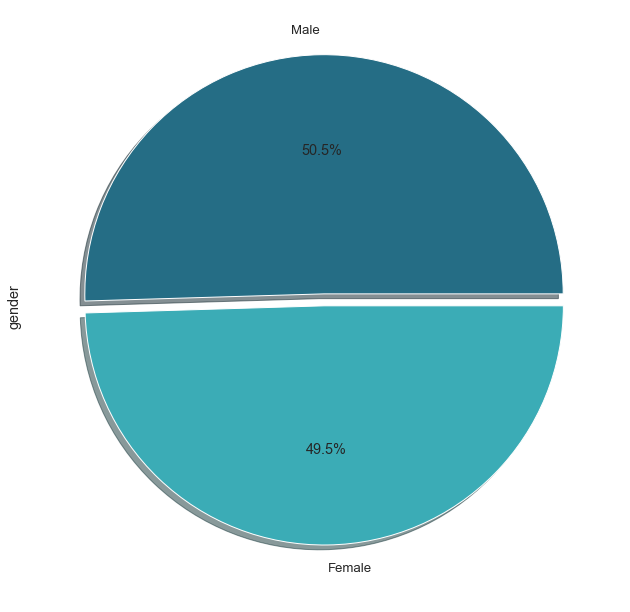

In [91]:
# plt.figure(figsize=(16, 6), dpi=80)
customers['gender'].value_counts(normalize=True).plot.pie(explode = [0.05, 0.0],autopct='%1.1f%%',shadow= True, colors= ['#256D85', '#3BACB6'])


## there is a variety on our data w.r.t ages about 16.3% seniorCitizen & 83.7% others

<AxesSubplot:ylabel='SeniorCitizen'>

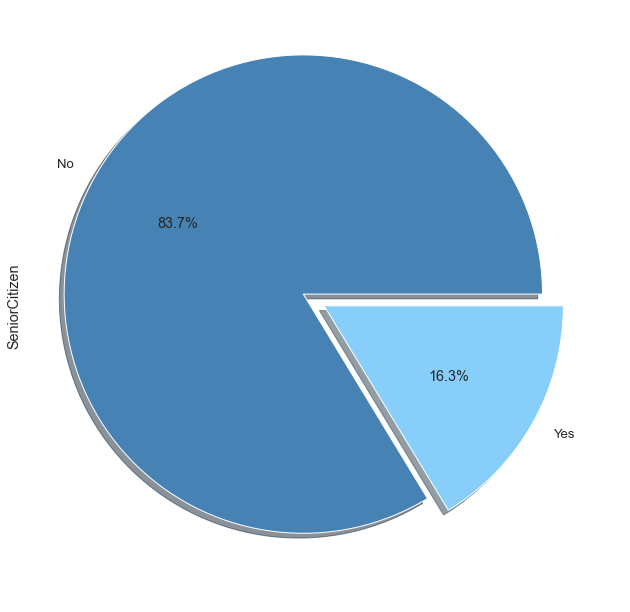

In [89]:
customers['SeniorCitizen'].value_counts(normalize=True).plot.pie(explode = [0.1, 0.0],autopct='%1.1f%%',shadow= True, colors= ['steelblue', 'lightskyblue'])


# EDA

In [192]:
churn_gp = customers.groupby('Churn')

## Customer personal Info Analysis

### 1. ratio of customers have partner and not have

<AxesSubplot:ylabel='Partner'>

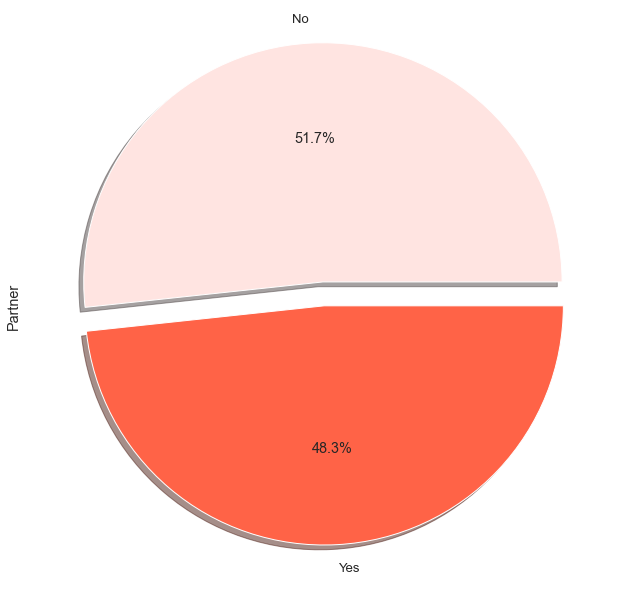

In [94]:
customers['Partner'].value_counts(normalize=True).plot.pie(explode = [0.1, 0.0],autopct='%1.1f%%',shadow= True, colors= ['mistyrose', 'tomato'])


### 2. ratio of customers have Dependents and not have

<AxesSubplot:ylabel='Dependents'>

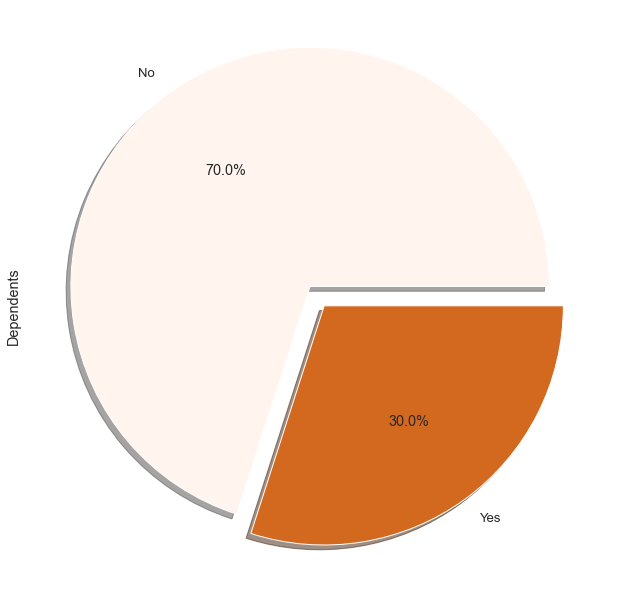

In [97]:
customers['Dependents'].value_counts(normalize=True).plot.pie(explode = [0.1, 0.0],autopct='%1.1f%%',shadow= True, colors= ['seashell', 'chocolate'])


### 3. Customer have Partner & Dependents (ratio)

In [100]:
partner_gp = customers.groupby('Partner')

In [105]:
(partner_gp['Dependents'].value_counts(normalize=True)*100)['Yes']

Dependents
Yes    51.410935
No     48.589065
Name: Dependents, dtype: float64

<AxesSubplot:ylabel='Dependents'>

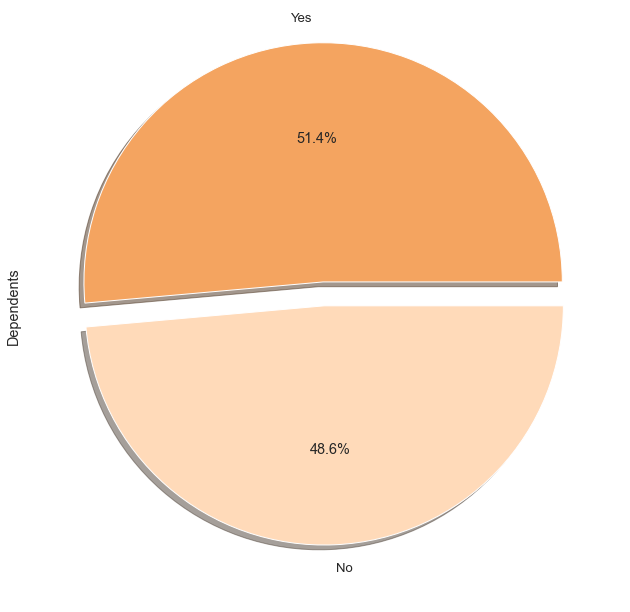

In [112]:
(partner_gp['Dependents'].value_counts(normalize=True)*100)['Yes'].plot.pie(explode = [0.1, 0.0],autopct='%1.1f%%',shadow= True, colors= ['sandybrown', 'peachpuff'])

### 4. Customer have no Partner, but have Dependents (ratio)

In [113]:
(partner_gp['Dependents'].value_counts(normalize=True)*100)['No']

Dependents
No     90.085141
Yes     9.914859
Name: Dependents, dtype: float64

<AxesSubplot:ylabel='Dependents'>

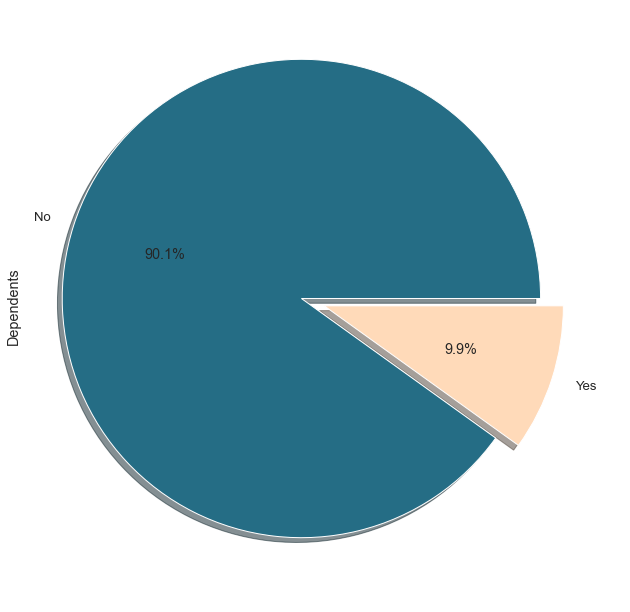

In [114]:
(partner_gp['Dependents'].value_counts(normalize=True)*100)['No'].plot.pie(explode = [0.1, 0.0],autopct='%1.1f%%',shadow= True, colors= ['#256D85', 'peachpuff'])

### 5. effect of the Partner's column on the target (Churn)

In [117]:
partner_gp['Churn'].value_counts(normalize=True)*100

Partner  Churn
No       No       67.042021
         Yes      32.957979
Yes      No       80.335097
         Yes      19.664903
Name: Churn, dtype: float64

#### parcentage of customers that have no Partner and leave the Company greater than those have Partners

Text(0.5, 1.0, 'Customers Have NO Partner Vs Churn')

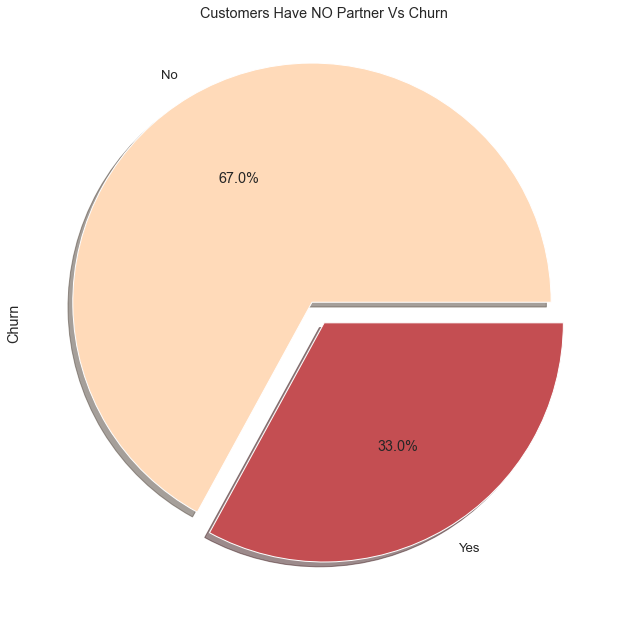

In [126]:
(partner_gp['Churn'].value_counts(normalize=True)*100)['No'].plot.pie(explode = [0.1, 0.0],autopct='%1.1f%%',shadow= True, colors= ['peachpuff', 'r'])
plt.title('Customers Have NO Partner Vs Churn')

Text(0.5, 1.0, 'Customers Have Partner Vs Churn')

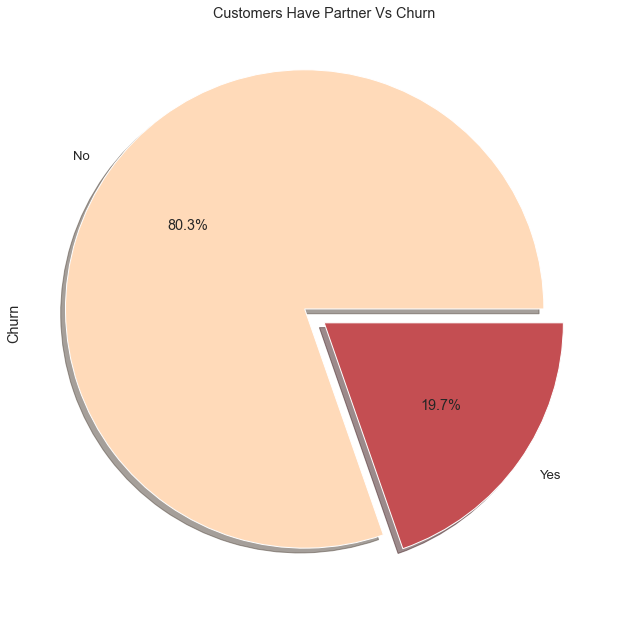

In [125]:
(partner_gp['Churn'].value_counts(normalize=True)*100)['Yes'].plot.pie(explode = [0.1, 0.0],autopct='%1.1f%%',shadow= True, colors= ['peachpuff', 'r'])
plt.title('Customers Have Partner Vs Churn')

In [149]:
gender_gp = customers.groupby('gender')

In [167]:
def set_per_barh(ax):
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width:0.1f}%', (x + width/2, y + height*1.02), ha='center')

## Ratio between males and females that leave the Company

In [198]:
churn_gp['gender'].value_counts(normalize=True)

Churn  gender
No     Male      0.507344
       Female    0.492656
Yes    Female    0.502408
       Male      0.497592
Name: gender, dtype: float64

In [151]:
(gender_gp['Churn'].value_counts(normalize=True)*100).xs('Yes',level='Churn')

gender
Female    26.920872
Male      26.160338
Name: Churn, dtype: float64


<p>

    
gender has no effect on our target
</p>


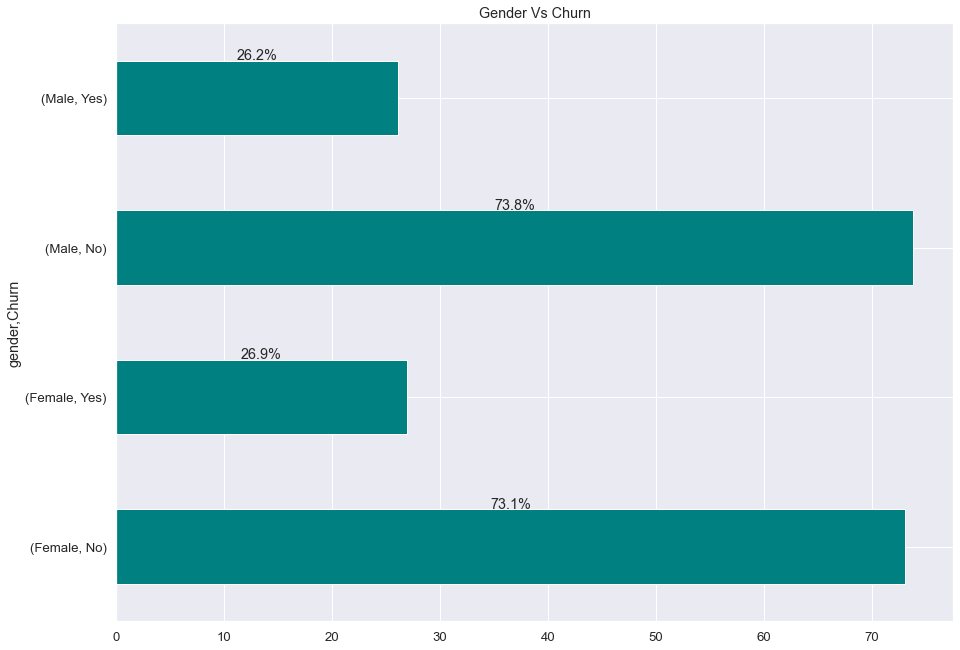

In [196]:
ax = (gender_gp['Churn'].value_counts(normalize=True)*100).plot.barh(color='teal')
plt.title('Gender Vs Churn')
set_per_barh(ax)

### Services provided by the company

In [127]:
customers.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [128]:
services_not_related_to_internet = ['PhoneService','MultipleLines']
services_related_to_internet = ['InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

### A. Services not related to the internet

In [129]:
customers[services_not_related_to_internet[0]].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [130]:
customers[services_not_related_to_internet[1]].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [131]:
phoneServices_gp = customers.groupby('PhoneService')

In [ ]:
## Ration between customers that have MultipleLines and 

In [173]:
(phoneServices_gp['MultipleLines'].value_counts(normalize=True)*100)

PhoneService  MultipleLines   
No            No phone service    100.000000
Yes           No                   53.293507
              Yes                  46.706493
Name: MultipleLines, dtype: float64

## 1. effect of the MultipleLines' column on the target

<AxesSubplot:ylabel='MultipleLines'>

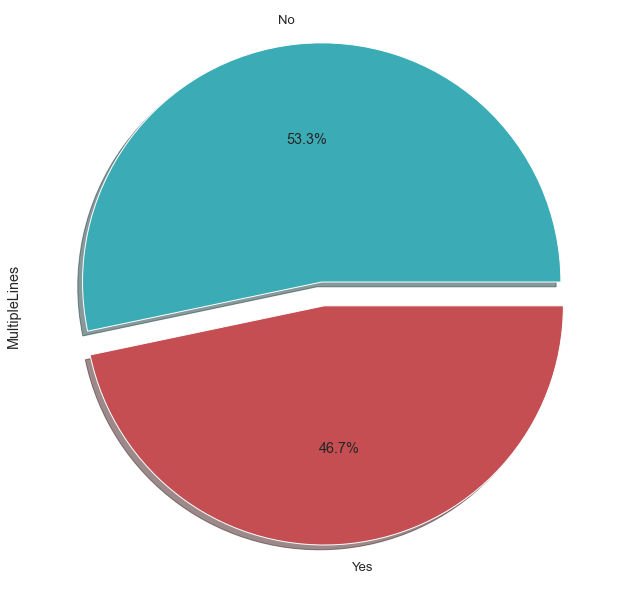

In [175]:
(phoneServices_gp['MultipleLines'].value_counts(normalize=True)*100)['Yes'].plot.pie(explode = [0.1, 0.0],autopct='%1.1f%%',shadow= True, colors= ['#3BACB6', 'r'])

In [179]:
mult_gp = customers.groupby('MultipleLines')
mult_gp['Churn'].value_counts()

MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: Churn, dtype: int64

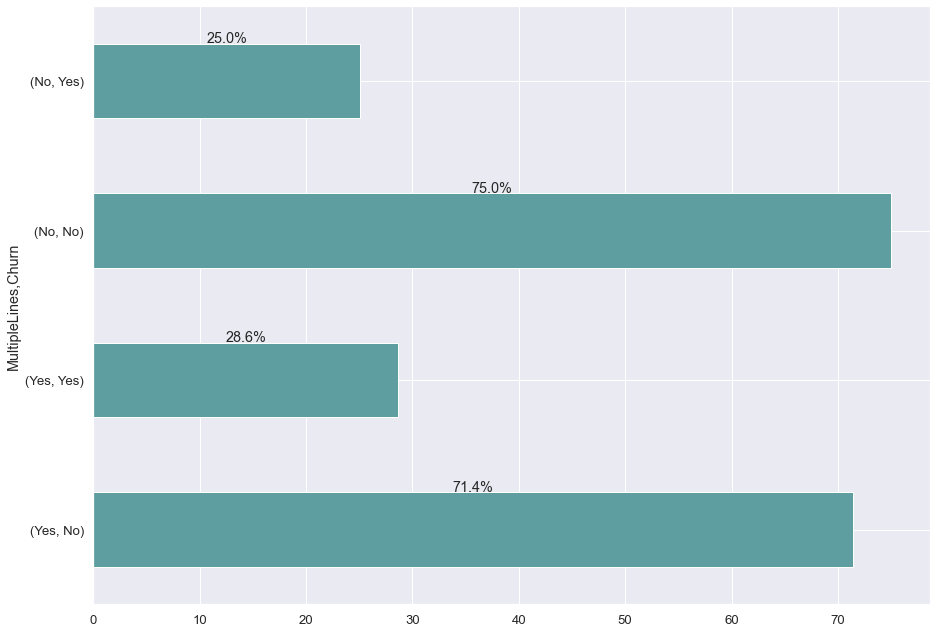

In [190]:
ax = (mult_gp['Churn'].value_counts(normalize=True)*100)[['Yes','No']].plot.barh(color='cadetblue')
set_per_barh(ax)

percentage of customers that have the phoneService and leave the company is so close to those who don't have the service and leave which may give us an indication that the phone service is not the reason to make the customers leave

In [143]:
phoneServices_gp['Churn'].value_counts(normalize=True)*100

PhoneService  Churn
No            No       75.073314
              Yes      24.926686
Yes           No       73.290363
              Yes      26.709637
Name: Churn, dtype: float64

## 2. Percentage of Customer that have phone service and leave the company

Text(0.5, 1.0, 'Have Phone service Vs Churn')

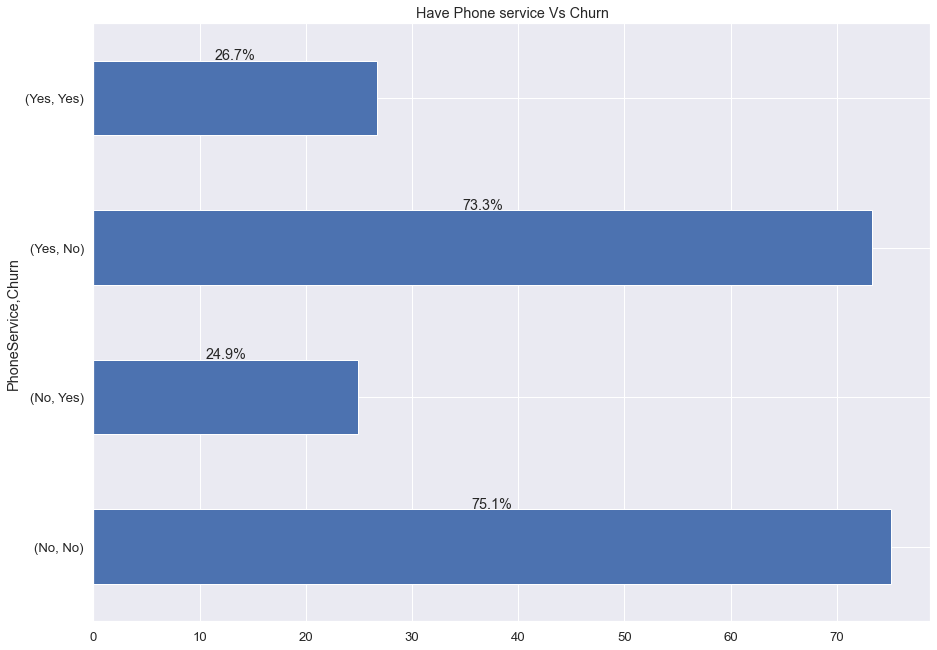

In [188]:
ax =(phoneServices_gp['Churn'].value_counts(normalize=True)*100).plot.barh()
set_per_barh(ax)
plt.title('Have Phone service Vs Churn')

<AxesSubplot:>

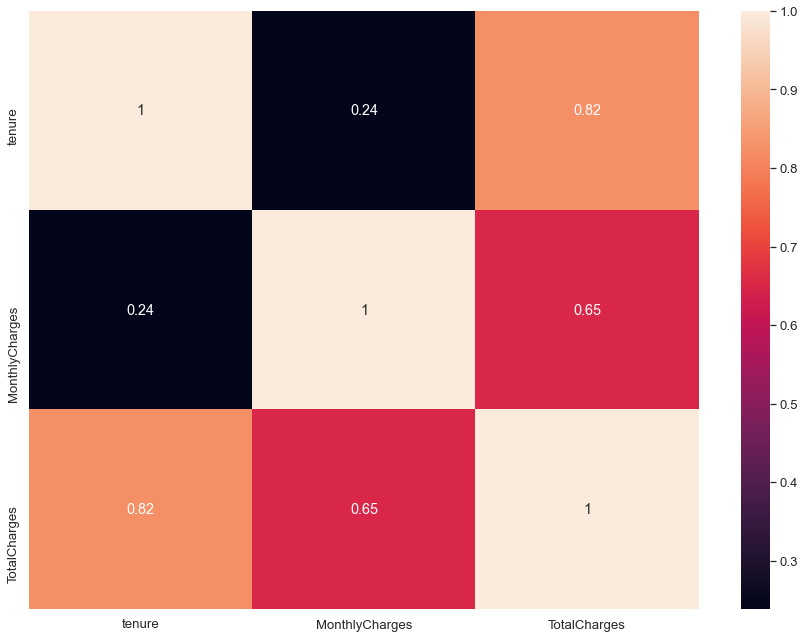

In [199]:
sns.heatmap(customers.corr(),annot=True)

<p>there is a strong correlation between tenure and TotalCharges</p>

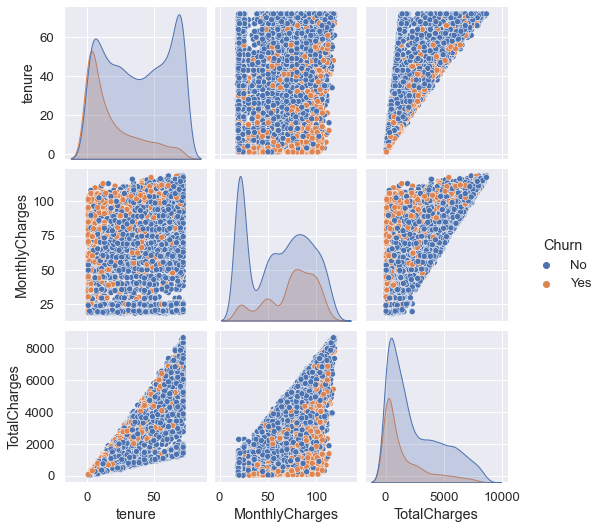

In [201]:
sns.pairplot(customers,hue='Churn')

### there is a weak relationship between the tenure and TotalCharge from the below fig!

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

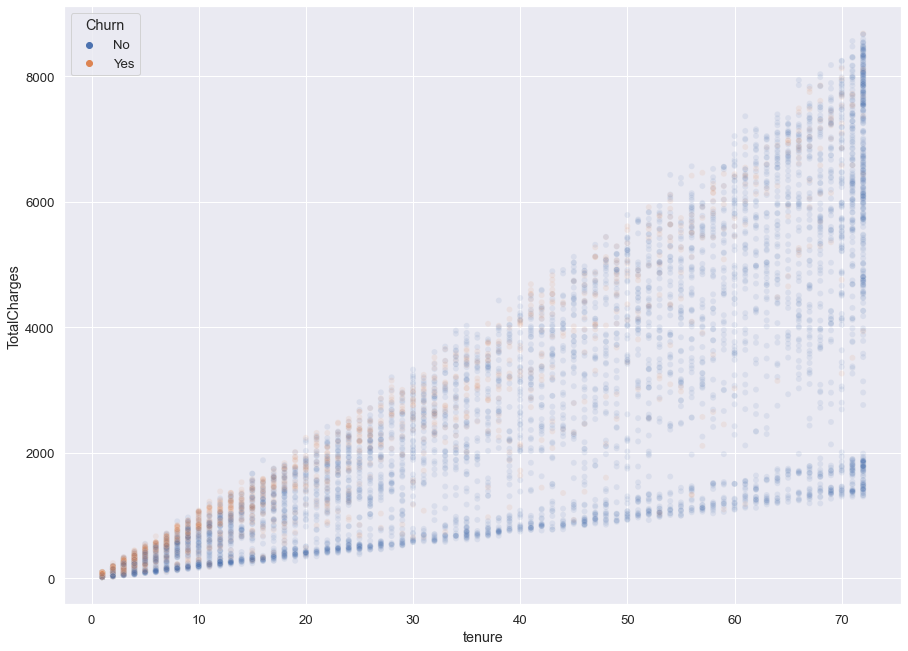

In [83]:
sns.scatterplot(x='tenure',y='TotalCharges',hue='Churn',data=customers,alpha=0.1)
## adding alpha: transparency to allow for overlaps to be visible, or reducing point size so that fewer overlaps occur.
## by adding the hue arg we can identify the membersip of that point to our target 

## InternetServices provided by the company

In [228]:
(customers['InternetService'].value_counts(normalize=True)*100)

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

<AxesSubplot:>

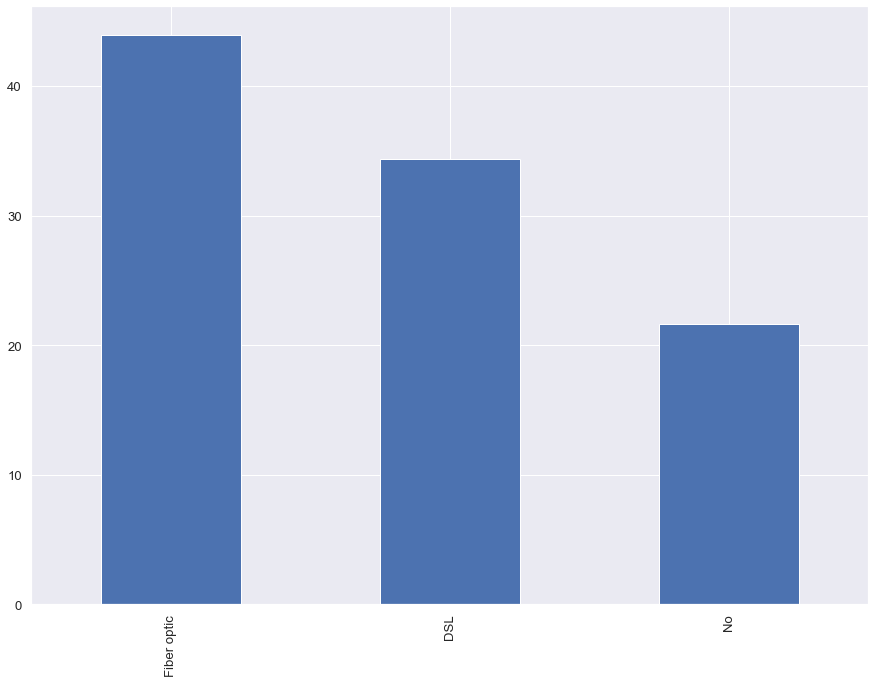

In [227]:
(customers['InternetService'].value_counts(normalize=True)*100).plot.bar()

## Customer that have StreamingMovies service

In [204]:
internet_gp = customers.groupby('InternetService')

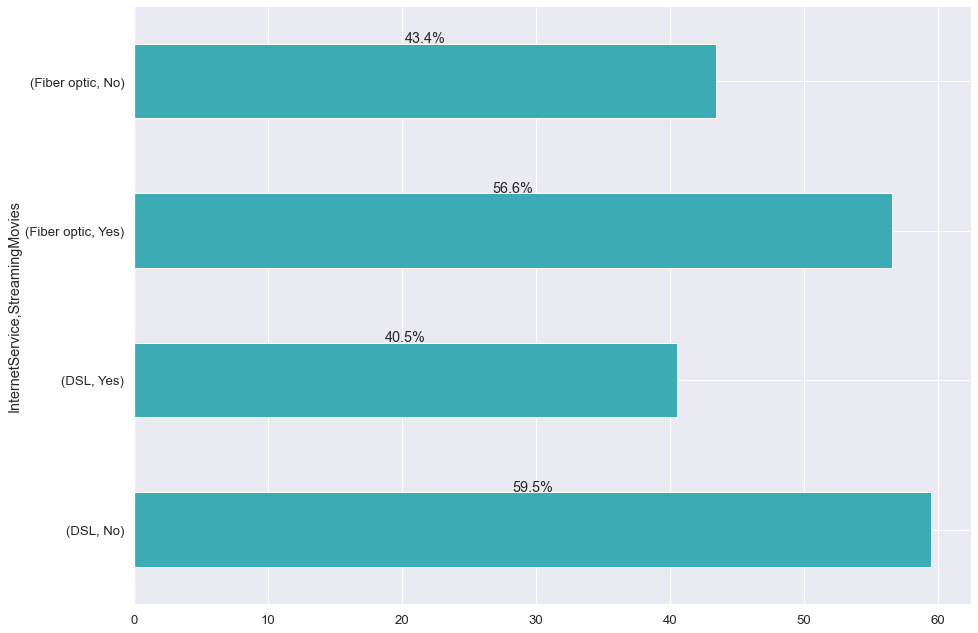

In [215]:
ax=(internet_gp['StreamingMovies'].value_counts(normalize=True)*100)[['DSL','Fiber optic']].plot.barh(color='#3BACB6')
set_per_barh(ax)

## constract catagories

<AxesSubplot:ylabel='Contract'>

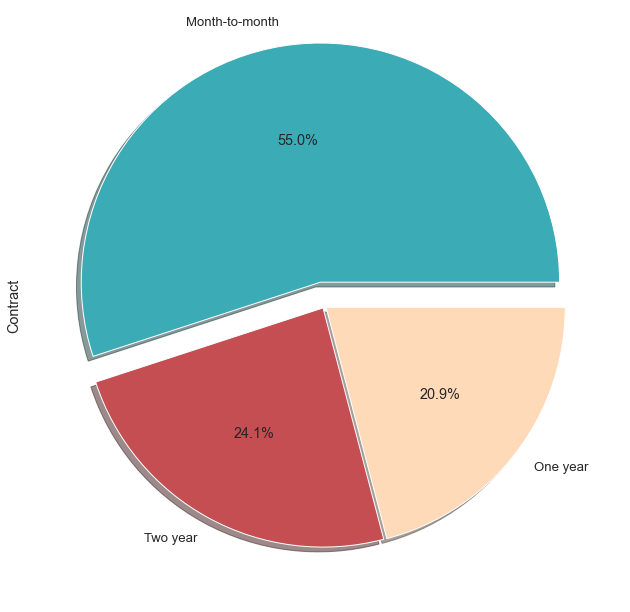

In [224]:
(customers['Contract'].value_counts(normalize=True)*100).plot.pie(explode = [0.1, 0.01,0.01],autopct='%1.1f%%',shadow= True, colors= ['#3BACB6', 'r','peachpuff'])

## ratio between users use Streaming move to StreamingTv

In [230]:
customers['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [231]:
customers['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [232]:
streaming_mv_gp = customers.groupby('StreamingMovies')

Text(0.5, 1.0, 'StreamingMovies And StreamingTV')

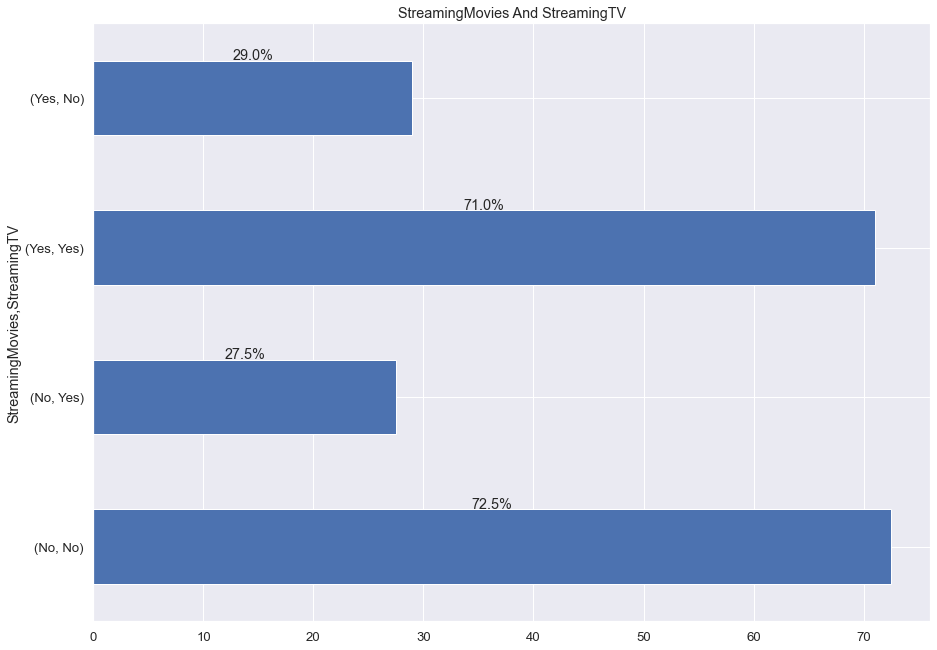

In [238]:
ax = ((streaming_mv_gp['StreamingTV'].value_counts(normalize=True)*100)[['No','Yes']]).plot.barh()
set_per_barh(ax)
plt.title('StreamingMovies And StreamingTV')

## Most important customer according to monthly rate

In [239]:
customers['MonthlyCharges'].idxmax()

4586

In [240]:
customers.iloc[4586:4587]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4586,7569-NMZYQ,Female,No,Yes,Yes,72.0,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No


## Most important customer according to Total rate

In [242]:
customers['TotalCharges'].idxmax()

4610

In [243]:
customers.iloc[4610:4611]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,No,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.8,8684.8,Yes


## payment methods which the company provide the customers with

<AxesSubplot:ylabel='PaymentMethod'>

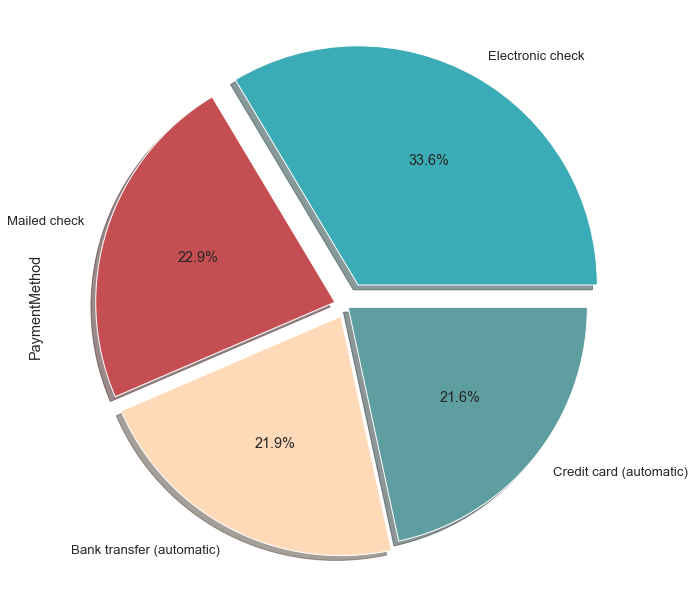

In [249]:
(customers['PaymentMethod'].value_counts(normalize=True)*100).plot.pie(explode = [0.1,0.05, 0.05,0.01],autopct='%1.1f%%',shadow= True, colors= ['#3BACB6', 'r','peachpuff','cadetblue'])

## Churn rate

<AxesSubplot:ylabel='Churn'>

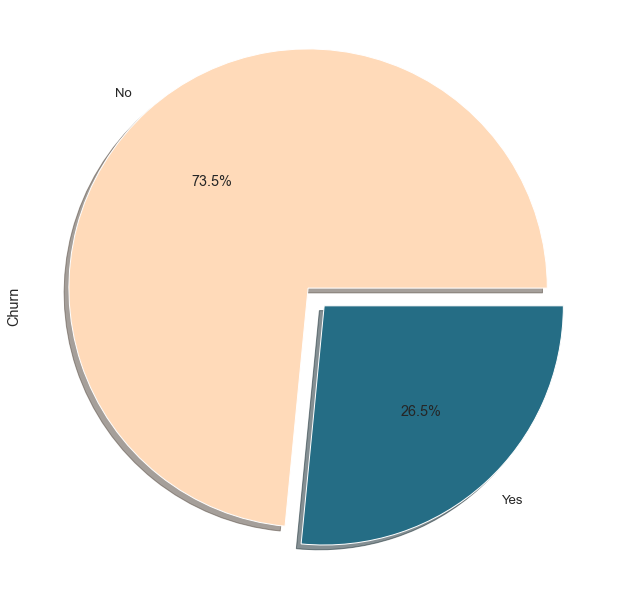

In [252]:
(customers['Churn'].value_counts(normalize=True)*100).plot.pie(explode = [0.1, 0.0],autopct='%1.1f%%',shadow= True, colors= ['peachpuff', '#256D85'])

## offers according to monthly charge

In [253]:
customers['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [256]:
def offer(x):
     if x>=18.25 and x<39.25:
        return offers[0]
     elif x>= 39.25 and x<60.25: 
        return offers[1]
     elif x>=60.25 and x<81.25: 
        return offers[2] 
     elif x>= 81.25 and x< 102.25: 
        return offers[3]
     else:
        return offers[4]  
    
offers = ['offer1','offer2','offer3','offer4','offer5']
customers['MonthlyChargeOffers'] = customers['MonthlyCharges'].apply(offer)

<AxesSubplot:ylabel='MonthlyChargeOffers'>

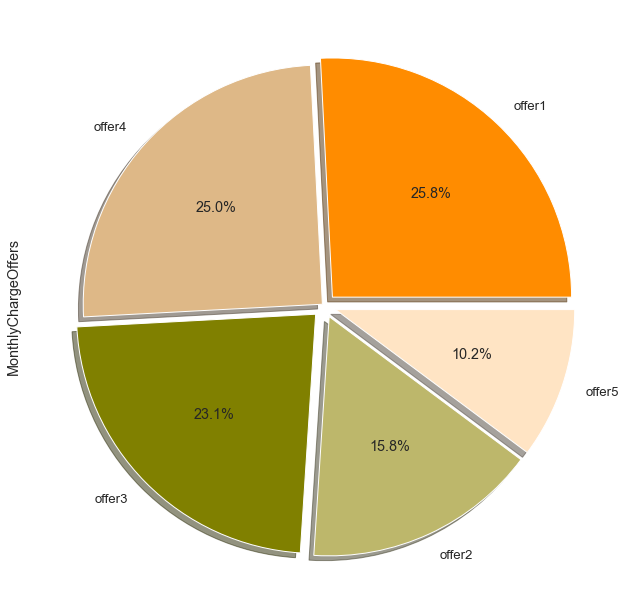

In [270]:
(customers['MonthlyChargeOffers'].value_counts(normalize=True)*100).plot.pie(explode = [0.05,0.01, 0.05,0.05,0.05],autopct='%1.1f%%',shadow= True, colors= ['darkorange', 'burlywood','olive','darkkhaki','bisque'])